# Input Python Packages

In [2]:
from cantera.ck2cti import convertMech
import cantera as ct
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

# Convert CHEMKIN to Cantera Format

# Test For High Temperature System 

### Import Data from CHEMKIN for Validation

In [14]:
gas = ct.Solution('HP-Mech-Plasma_V.CY.cti')
import pandas as pd
df=pd.read_csv('CH3OH_High_Temp.csv')

In [15]:
gas = ct.Solution('HP-Mech-Plasma_V.CY.cti')
gas.TPX = 1000, ct.one_atm*10, 'CH3OH:2,O2:3,N2:4'
r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])
sim.verbose = True
dt_max = 5.0e-7
t_end = 1.0e-2
states = ct.SolutionArray(gas, extra=['t'])

while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    
    states.append(r.thermo.state, t=sim.time*1e3)
    #print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(sim.time, r.T, r.thermo.P, r.thermo.u))




**** WARNING ****
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.505
	Value computed using high-temperature polynomial: 107.348


**** WARNING ****
For species CH3NO2, discontinuity in cp/R detected at Tmid = 1500
	Value computed using low-temperature polynomial:  17.959
	Value computed using high-temperature polynomial: 15.9882


**** WARNING ****
For species CH3NO2, discontinuity in h/RT detected at Tmid = 1500
	Value computed using low-temperature polynomial:  4.50035
	Value computed using high-temperature polynomial: 4.29941


**** WARNING ****
For species CH3NO2, discontinuity in s/R detected at Tmid = 1500
	Value computed using low-temperature polynomial:  52.0754
	Value computed using high-temperature polynomial: 51.8545
Initializing reactor network.
Reactor 0: 95 variables.
              0 sensitivity params.
Number of equations: 95
Maximum time step:                0


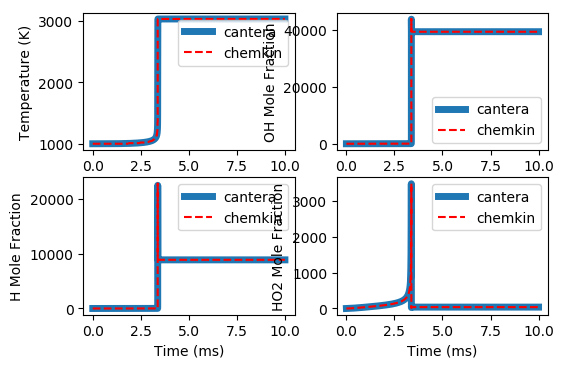

In [18]:

plt.clf()
plt.rcParams['figure.dpi'] = 500

plt.subplot(2, 2, 1)
plt.plot(states.t, states.T, linewidth=5.0, label='cantera')
plt.plot(df['Time_msec'], df['Temperature_K'],'r--', label='chemkin')
plt.legend()

plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('OH')], linewidth=5.0, label='cantera')
plt.plot(df['Time_msec'], df['Ppm_OH_ppm'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('H')], linewidth=5.0,label='cantera')
plt.plot(df['Time_msec'], df['Ppm_H_ppm'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('HO2')], linewidth=5.0, label='cantera')
plt.plot(df['Time_msec'], df['Ppm_HO2_(ppm)'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('HO2 Mole Fraction')
plt.legend()

plt.show()



# Demo For O(1D) + EtOH System 

### Missing: Mass Flow Controller (MFC) calculation to yield number density

### Define the gas system

In [11]:
gas = ct.Solution('HP-Mech-Plasma_V.CY_final.cti')

# Cantera always uses SI units!
T= 296.0 
P = 60/760*101325

# Create an array to set the composition
X = np.zeros(gas.n_species)

##
ifuel = gas.species_index ('C2H5OH')
io2 =   gas.species_index('O2')
ihe =   gas.species_index('HE')
io3 =   gas.species_index('O3')
io  =   gas.species_index('O')
io1d =  gas.species_index('O(SING)')

### Start Time-dependent Simulations

In [12]:
# Specify initial Composition 
ifuel = gas.species_index ('C2H5OH')
io2 =   gas.species_index('O2')
ihe =   gas.species_index('HE')
io3 =   gas.species_index('O3')
io  =   gas.species_index('O')
io1d =  gas.species_index('O(SING)')

# mol/cm3 could be optimized
X[ihe]   = 3.27e-6
X[ifuel] = 9.38e-9
X[io2]   = 2.70e-8
X[io3]   = 4.10e-10
X[io1d]  = 5e-11
X[io]    = 1.3e-11


gas.TPX = T, P, X
gas()

# Define a ideal-gas-constant-pressure system
r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])
sim.verbose = True
dt_max = 1e-6
t_end = 1e-2
states = ct.SolutionArray(gas, extra=['t'])
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time*1e3)
    #print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(sim.time, r.T, r.thermo.P, r.thermo.u))


  gas:

       temperature             296  K
          pressure         7999.34  Pa
           density       0.0141591  kg/m^3
  mean mol. weight         4.35619  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy     -1.5756e+05       -6.864e+05     J
   internal energy     -7.2252e+05       -3.147e+06     J
           entropy           34153        1.488e+05     J/K
    Gibbs function     -1.0267e+07       -4.472e+07     J
 heat capacity c_p            4817        2.098e+04     J/K
 heat capacity c_v          2908.4        1.267e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                 O    3.93123e-06      1.44386e-05           66.889
                O2     0.00816486        0.0599757         -32.0207
                HE       0.988856          0.90859          -17.723
           O(SING)    1.5120

In [13]:
import pandas as pd
df=pd.read_csv('EtOH.csv')

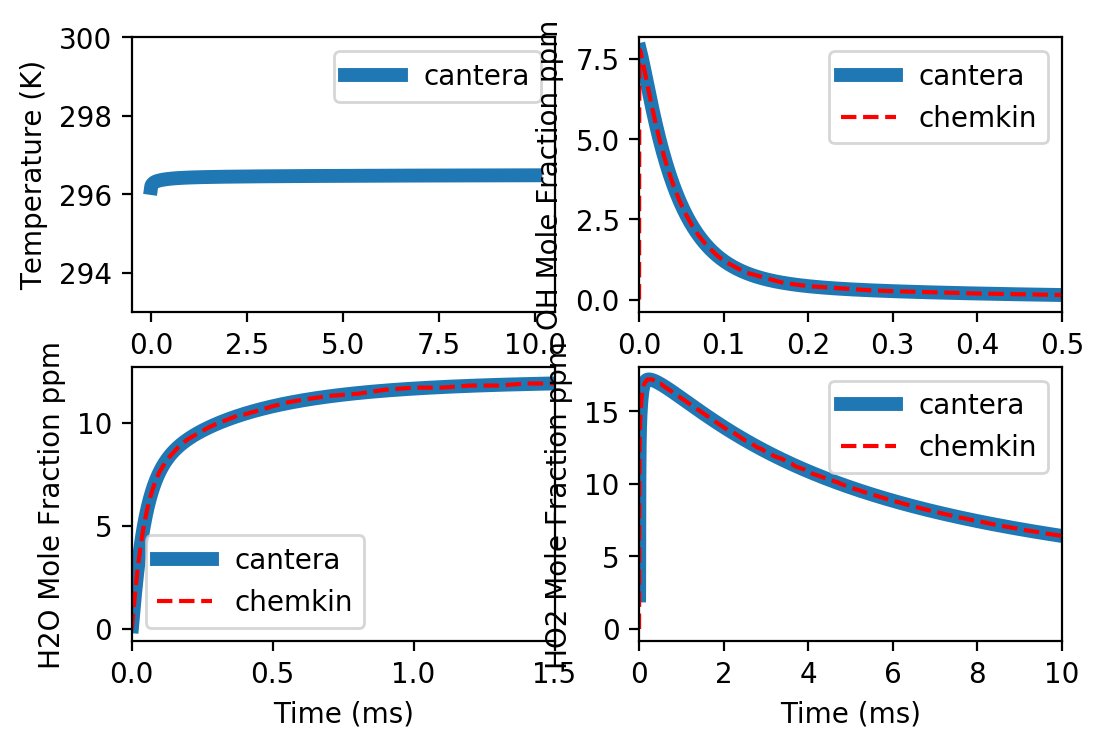

In [15]:
# Post-processing

plt.clf()
plt.rcParams['figure.dpi'] = 200

plt.subplot(2, 2, 1)
plt.plot(states.t, states.T, linewidth=5.0, label='cantera')
#plt.plot(df['Time_msec'], df['Temperature_K'],'r--', label='chemkin')
plt.legend()
plt.ylim([293,300])
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')



plt.subplot(2, 2, 2)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('OH')], linewidth=5.0, label='cantera')
plt.plot(df['Time_msec'], df['Ppm_OH_ppm'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction ppm')
plt.legend()
plt.xlim([0,0.5])


plt.subplot(2, 2, 3)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('H2O')], linewidth=5.0,label='cantera')
plt.plot(df['Time_msec'], df['Ppm_H2O_ppm'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('H2O Mole Fraction ppm')
plt.legend()
plt.xlim([0,1.5])

plt.subplot(2, 2, 4)
plt.plot(states.t, 1e6*states.X[:,gas.species_index('HO2')], linewidth=5.0, label='cantera')
plt.plot(df['Time_msec'], df['Ppm_HO2_ppm'],'r--', label='chemkin')
plt.xlabel('Time (ms)')
plt.ylabel('HO2 Mole Fraction ppm')
plt.legend()
plt.xlim([0,10])
plt.show()

# How should we adjust rate and branching ratios in Cantera ?

# How should we visualize reaction pathways?

# Missing: How should we do sensitivity analysis?

# Missing: How should we derive reduced Mech?

I already have ideas about how to do the missing part. :)